<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [187]:
# import numpy as np

# http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

import numpy as np
import pandas as pd


data = {'hr': [1,2,3,4,5,6,7,8,9,10,11,12], 'mnth': [1,2,3,4,5,6,7,8,9,10,11,12]}

df = pd.DataFrame(data)
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))

In [137]:
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)
df['hr']=hr

# mnth = []
# for x in range(0,12):
#     mnth.append(x+1)
# df['mnth']=mnth

In [138]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [139]:
df

,hr,hr_sin,hr_cos
0,1,2.588190e-01,9.659258e-01
1,2,5.000000e-01,8.660254e-01
2,3,7.071068e-01,7.071068e-01
3,4,8.660254e-01,5.000000e-01
4,5,9.659258e-01,2.588190e-01
5,6,1.000000e+00,6.123234e-17
6,7,9.659258e-01,-2.588190e-01
7,8,8.660254e-01,-5.000000e-01
8,9,7.071068e-01,-7.071068e-01
9,10,5.000000e-01,-8.660254e-01


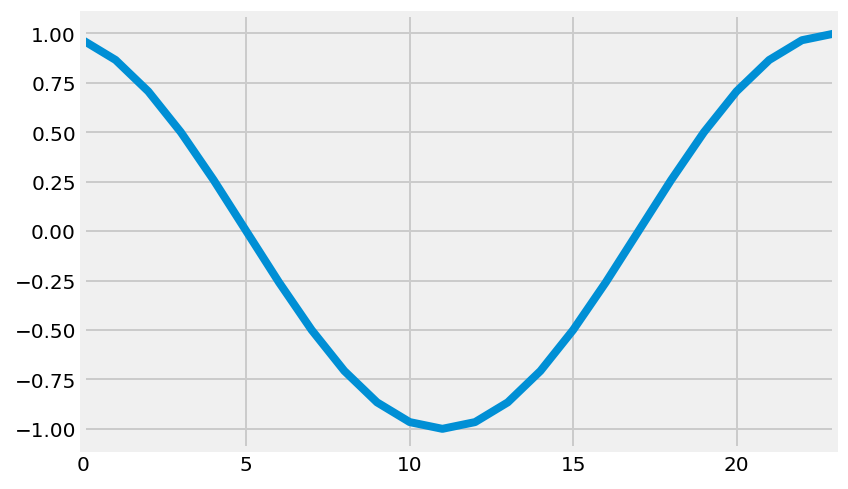

In [140]:
df.hr_cos.plot()

In [141]:
import matplotlib.pyplot as plt

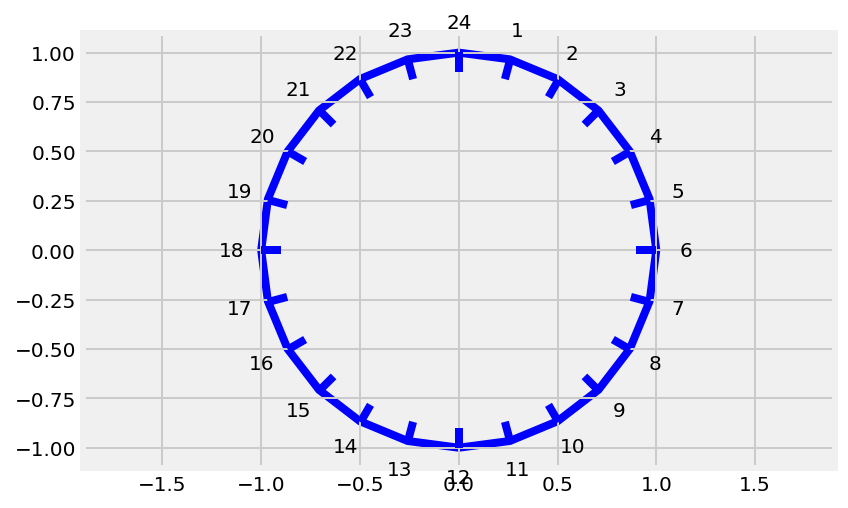

In [143]:
plt.axis('equal')
plt.fill(df['hr_sin'],df['hr_cos'], lw=4, ec='b', fill=False, zorder=0)
# plt.scatter(df['hr_sin'],df['hr_cos'], label= df['hr'], zorder=10)#, lw=4, ec='b', fill=False)

for i in range(24):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=100, c='b')
    
for i, txt in enumerate(hr):
    plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')


In [144]:
for i, txt in enumerate(hr):
    print(i, txt, (df['hr_sin'][i], df['hr_cos'][i]))

0 1 (0.25881904510252074, 0.9659258262890683)
1 2 (0.49999999999999994, 0.8660254037844387)
2 3 (0.7071067811865475, 0.7071067811865476)
3 4 (0.8660254037844386, 0.5000000000000001)
4 5 (0.9659258262890682, 0.25881904510252096)
5 6 (1.0, 6.123233995736766e-17)
6 7 (0.9659258262890683, -0.25881904510252063)
7 8 (0.8660254037844388, -0.4999999999999998)
8 9 (0.7071067811865476, -0.7071067811865475)
9 10 (0.5000000000000003, -0.8660254037844385)
10 11 (0.258819045102521, -0.9659258262890682)
11 12 (1.2246467991473532e-16, -1.0)
12 13 (-0.25881904510252035, -0.9659258262890684)
13 14 (-0.4999999999999998, -0.8660254037844388)
14 15 (-0.7071067811865471, -0.7071067811865479)
15 16 (-0.8660254037844384, -0.5000000000000004)
16 17 (-0.9659258262890681, -0.25881904510252146)
17 18 (-1.0, -1.8369701987210297e-16)
18 19 (-0.9659258262890684, 0.2588190451025203)
19 20 (-0.866025403784439, 0.4999999999999993)
20 21 (-0.7071067811865477, 0.7071067811865475)
21 22 (-0.5000000000000004, 0.86602540378

In [145]:
!ls CookBooks/Sources/

AdaBoostPicture.png       README.md                 image.png
DataScienceDefCricl.png   ShapeFiles                meme-books.png
DeWitteJuffer.csv         aurelien.jpeg             newton-right.jpg
MarkChainGraph.png        boosted-trees-process.png turnover.xlsx
MarkChainTransMatr.png    ga-natural-selection.png


In [210]:
path = '/Users/maartenk/Documents/git/CookBooks/Sources/'
file = 'turnover.xlsx'


In [211]:
df = pd.read_excel(path+file)

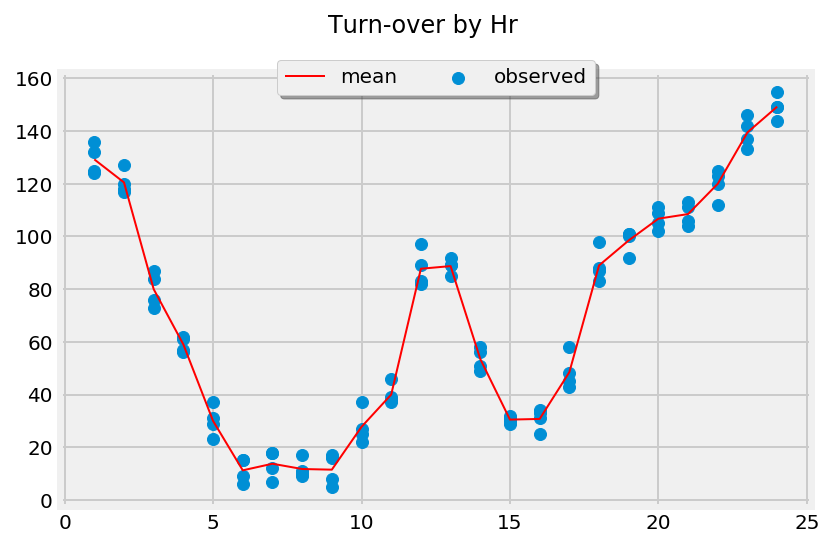

In [212]:
fig, ax = plt.subplots()
ax.scatter(df['hr'], df['turnover'], label='observed')
ax.plot(df.groupby(by = df['hr']).mean(), lw=1, c='r', label='mean')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
fig.suptitle('Turn-over by Hr')
plt.show()

In [213]:
import seaborn as sns

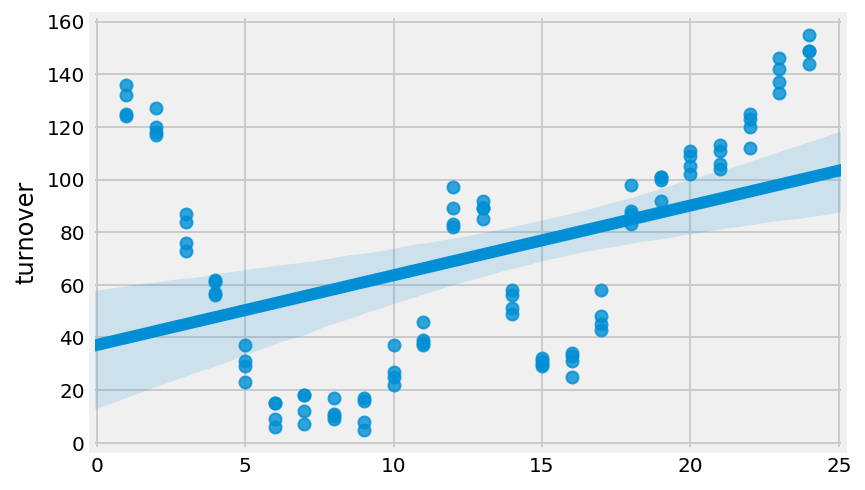

In [214]:
sns.regplot(df[['hr']], df['turnover']);

In [215]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr']], df[['turnover']])
model.score(df[['hr']], df[['turnover']])

0.1733796432227398

In [216]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
model = LinearRegression()

model.fit(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))
model.score(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))

0.17337964322273972

In [217]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [218]:
df.columns

Index(['hr', 'turnover', 'hr_sin', 'hr_cos'], dtype='object')

In [219]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr_sin', 'hr_cos']], df[['turnover']])
model.score(df[['hr_sin', 'hr_cos']], df[['turnover']])

0.635885836759986

In [220]:
X = pd.get_dummies(df['hr'])

In [221]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, df[['turnover']])
model.score(X, df[['turnover']])

0.9898820731294891

In [222]:
X.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [223]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

for m in ['d', '+', '|']:

    for i in range(24):
        a1, a2  = (df['hr_sin'],df['hr_cos'])
        angle = (np.linspace(0,360,24)).to_array()

        # make a markerstyle class instance and modify its transform prop
        t = mpl.markers.MarkerStyle(marker='|')
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter((a1), (a2), marker=t, s=100)

AttributeError: 'numpy.ndarray' object has no attribute 'to_array'

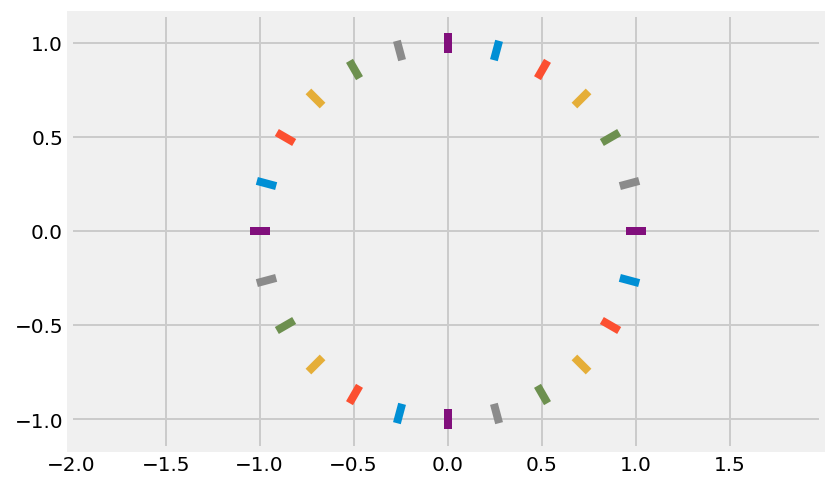

In [224]:
for i in range(24):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1), (a2), marker=t, s=100)
    plt.axis('equal')

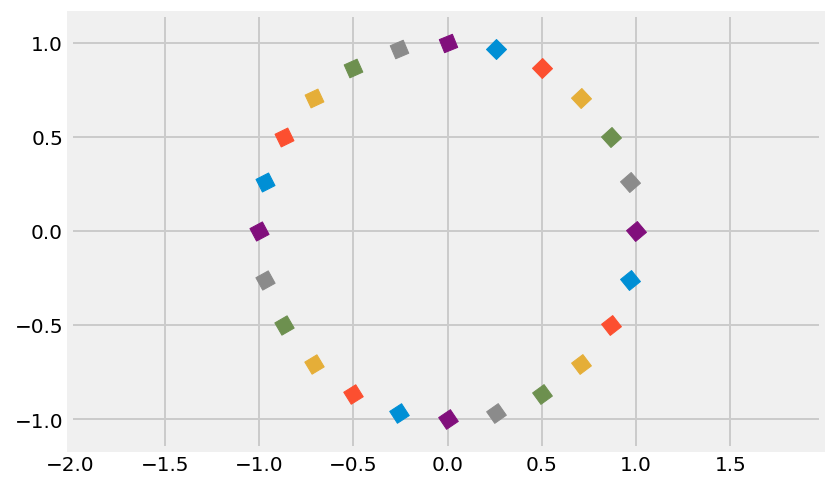

In [225]:
for i in range(24):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(-angle)
    marker = (4, 0, -i)
    plt.scatter((a1), (a2), marker=marker, s=100)
    plt.axis('equal')
    
    marker = (3, 0, 45)

In [226]:
np.array(np.linspace(15,360,23))

array([ 15.        ,  30.68181818,  46.36363636,  62.04545455,
        77.72727273,  93.40909091, 109.09090909, 124.77272727,
       140.45454545, 156.13636364, 171.81818182, 187.5       ,
       203.18181818, 218.86363636, 234.54545455, 250.22727273,
       265.90909091, 281.59090909, 297.27272727, 312.95454545,
       328.63636364, 344.31818182, 360.        ])

In [227]:
a1, a2  = (df['hr_sin'],df['hr_cos'])

In [228]:
for i in range(25):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


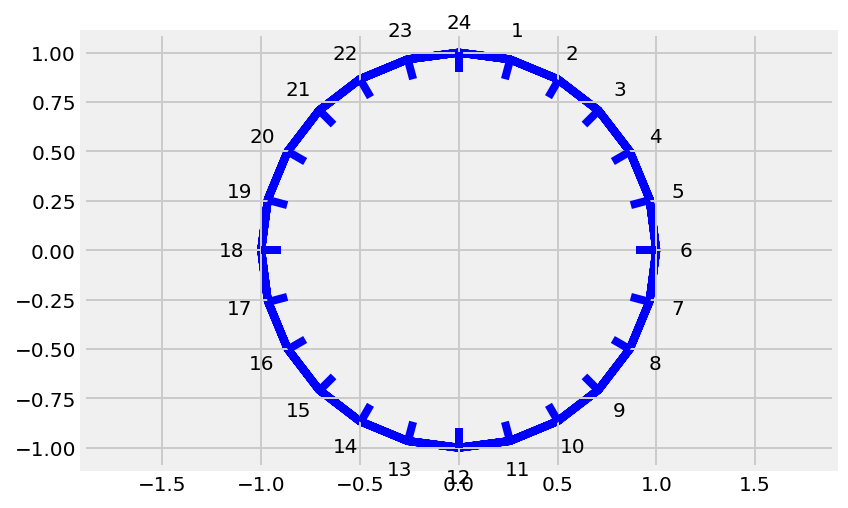

In [229]:
plt.axis('equal')
plt.fill(df['hr_sin'],df['hr_cos'], lw=4, ec='b', fill=False, zorder=0)
# plt.scatter(df['hr_sin'],df['hr_cos'], label= df['hr'], zorder=10)#, lw=4, ec='b', fill=False)

for i in range(24):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=100, c='b')
    
for i, txt in enumerate(hr):
    plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')



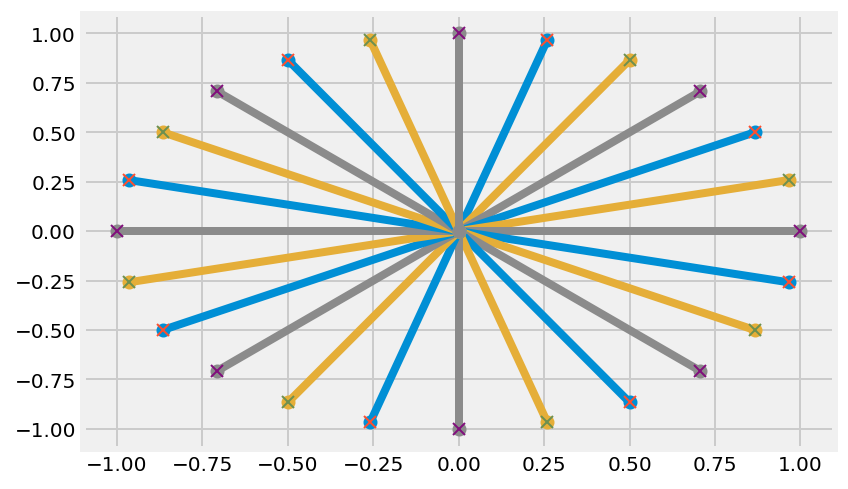

In [233]:
for i in range(0,24):
    plt.plot((df['hr_sin'][i],0), (df['hr_cos'][i],0), marker='o')
    plt.plot(df['hr_sin'][i], df['hr_cos'][i], marker='x')



In [242]:
radiusratio = df['turnover'].groupby(by = df['hr']).mean()\
/df['turnover'].groupby(by = df['hr']).sum().sum()

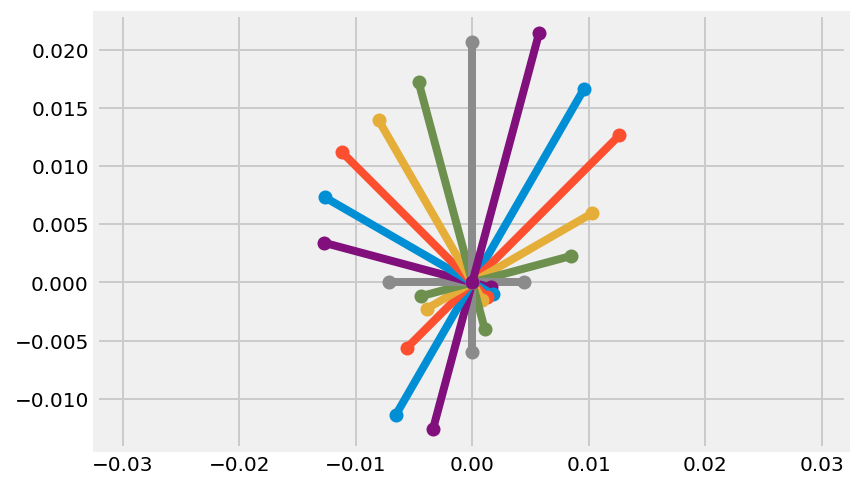

In [251]:
plt.axis('equal')
for i in range(1,25):
    plt.plot((df['hr_sin'][i]*radiusratio[i],0), (df['hr_cos'][i]*radiusratio[i],0), marker='o')
#     plt.plot(df['hr_sin'][i]*radiusratio[i],
#              df['hr_cos'][i]*radiusratio[i], marker='x')

In [259]:

hrcycle = [] 
for i in range(1,25):
    hrcycle.append(i)
hrcycle.append(1)
    

IndexError: list index out of range

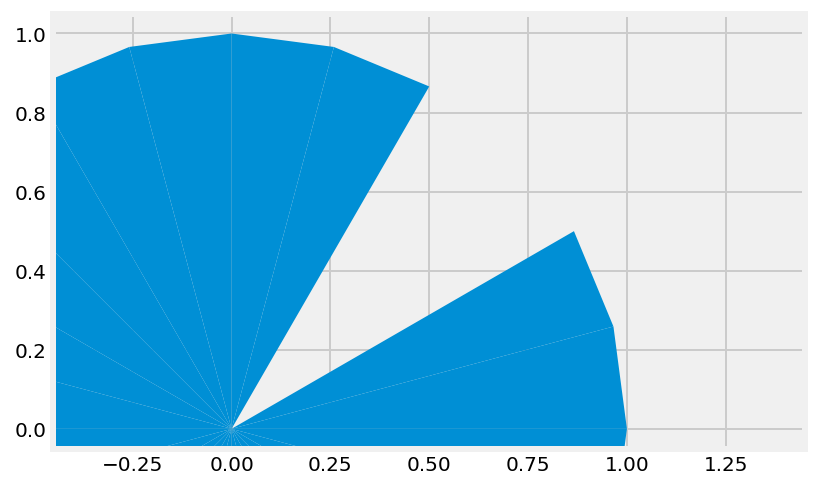

In [273]:
plt.figure()
plt.axis('equal')
for i in hrcycle[1:24]:
    t1 = plt.Polygon(((df['hr_sin'][hrcycle[i]], df['hr_cos'][hrcycle[i]]),\
                 (df['hr_sin'][hrcycle[i+1]], df['hr_cos'][hrcycle[i+1]]),\
                 (0,0)))
    plt.gca().add_patch(t1)
    
plt.show()

In [275]:
#  for i in hrcycle[hrcycle[1,24]]:
 for i in hrcycle:
        print(i+1)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
2


https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation